In [28]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [29]:
path_sf = rf'D:\OneDrive\Documentos\Materiais didáticos\MECAI\Dissertação\script\IBGE\BR_RG_Imediatas_2023\BR_RG_Imediatas_2023.shp'
geo_df = gpd.read_file(path_sf)
geo_df = geo_df.loc[geo_df['NM_UF'] == 'São Paulo']

In [30]:
dir_path = rf'D:\OneDrive\Documentos\Materiais didáticos\MECAI\Dissertação\script\Results'
name_path = 'results.csv'
complete_path = os.path.join(dir_path, name_path)

In [31]:
dir = rf'D:\OneDrive\Documentos\Materiais didáticos\MECAI\Dissertação\script\Dados Gerados Mestrado\Auxiliar'
df_dist_ZD_PA = pd.read_csv(os.path.join(dir, 'df_dist_ZD_PA.csv'))

In [32]:
def criar_excel(df, criar_novo=0, path=rf"C:\Users\rpafe\Desktop\dados_exportados.xlsx"):
    # Se criar_novo for 1 ou o arquivo não existir, cria um novo arquivo
    if criar_novo == 1 or not os.path.exists(path):
        mode = "w"
    else:
        mode = "a"

    with pd.ExcelWriter(path, mode=mode) as writer:
        # Obtendo o número da última sheet e incrementando (somente no modo 'a')
        if mode == "a":
            numsht = len(writer.book.sheetnames) + 1 if writer.book.sheetnames else 1
        else:
            numsht = 1  # Começa do primeiro se for um novo arquivo

        df.to_excel(writer, sheet_name=f"Sheet{numsht}")

    print(f"Arquivo Excel atualizado! {'Novo arquivo criado.' if criar_novo == 1 else 'Nova sheet adicionada.'}")


In [33]:
df = pd.read_csv(complete_path, encoding='latin1', sep=',')   

meses_dict = {
    0: '01-Jan', 1: '02-Fev', 2: '03-Mar', 3: '04-Abr', 
    4: '05-Mai', 5: '06-Jun', 6: '07-Jul', 7: '08-Ago', 
    8: '09-Set', 9: '10-Out', 10: '11-Nov', 11: '12-Dez'
}
df['Mes'] = df['Tempo'].apply(lambda x: meses_dict[x])

In [34]:
# df_fab = df.loc[df['Ref']=='Fabrica',:].groupby(['Ref', 'Origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
#     applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)
# criar_excel(df_fab, criar_novo=1, path=rf"C:\Users\rpafe\Desktop\dados_exportados.xlsx")

# df_fab

In [35]:
df.loc[df['Ref'] == 'CD'].groupby(['Ref', 'uf_origem', 'uf_origem', 'cid_origem', 'Origem', 'Mes'])['z_w'].max().unstack(level='Mes')

,,,,Mes,01-Jan,02-Fev,03-Mar,04-Abr,05-Mai,06-Jun,07-Jul,08-Ago,09-Set,10-Out,11-Nov,12-Dez
Ref,uf_origem,uf_origem,cid_origem,Origem,,,,,,,,,,,,
CD,SP,SP,Guarulhos,CD_0002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df.loc[df['Ref'] == 'Fabrica', :].groupby(['Ref', 'Origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
    applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_28016\2141650626.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


Mes                      01-Jan  02-Fev  03-Mar  04-Abr  05-Mai  06-Jun  \
Ref     Origem Abrv Var                                                   
Fabrica F_0001 qac            0  11,700  11,700  11,700  11,700  11,700   
               qfra           0       0   9,101       0  63,699  11,700   
               qrf            0       0       0       0       0       0   
               sf        51,999  51,999  51,999  51,999  51,999  51,999   
               sfbc      25,999  14,299  11,700       0  51,999  51,999   
               sfrf      26,000  37,700  40,299  51,999       0       0   

Mes                      07-Jul  08-Ago  09-Set  10-Out  11-Nov  12-Dez  
Ref     Origem Abrv Var                                                  
Fabrica F_0001 qac       11,700  11,700  11,700  11,700  11,700  11,700  
               qfra      11,700  11,700  11,700  11,700  11,700  11,700  
               qrf            0       0       0       0       0       0  
               sf        51,999  51,999  51,999  51,999  51,999  51,999  
               sfbc      51,999  51,999  51,999  51,999  51,999  51,999  
               sfrf           0       0       0       0       0       0

In [37]:
df.loc[df['Ref'] == 'CD'].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
    applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_28016\1038743238.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


Mes                                                 01-Jan   02-Fev   03-Mar  \
Ref Origem  uf_origem cid_origem Origem  Abrv Var                              
CD  CD_0002 SP        Guarulhos  CD_0002 qap             0   43,051  131,057   
                                         qrd             0   32,955    3,492   
                                         qrf             0   11,700   11,700   
                                         sc        297,372  355,915  355,915   
                                         scbp      136,499  207,521  182,348   
                                         scbt      102,374   94,184   94,184   
                                         scrd       19,500        0    9,963   
                                         scrf       39,000   54,209   69,419   

Mes                                                 04-Abr   05-Mai   06-Jun  \
Ref Origem  uf_origem cid_origem Origem  Abrv Var                              
CD  CD_0002 SP        Guarulhos  CD_0002 qap       122,007   73,850  103,875   
                                         qrd             0   36,873   13,455   
                                         qrf        11,700   11,700   11,700   
                                         sc        368,458  392,284  409,503   
                                         scbp      166,226  198,261  200,270   
                                         scbt       94,184   94,184   94,184   
                                         scrd       23,418        0        0   
                                         scrf       84,629   99,839  115,049   

Mes                                                 07-Jul   08-Ago   09-Set  \
Ref Origem  uf_origem cid_origem Origem  Abrv Var                              
CD  CD_0002 SP        Guarulhos  CD_0002 qap       109,740   85,492   73,447   
                                         qrd        12,160    9,532    7,468   
                                         qrf        11,700   11,700   11,700   
                                         sc        409,205  409,503  403,269   
                                         scbp      196,414  207,744  212,723   
                                         scbt       85,122   66,726   52,277   
                                         scrd            0        0        0   
                                         scrf      127,669  135,034  138,270   

Mes                                                 10-Out   11-Nov   12-Dez  
Ref Origem  uf_origem cid_origem Origem  Abrv Var                             
CD  CD_0002 SP        Guarulhos  CD_0002 qap        59,503   60,235   76,550  
                                         qrd         7,304    6,693        0  
                                         qrf        11,700   11,700   11,700  
                                         sc        409,503  409,503  332,953  
                                         scbp      217,197  219,790  201,790  
                                         scbt       51,128   46,850        0  
                                         scrd            0        0        0  
                                         scrf      141,178  142,863  131,163

In [38]:
df.loc[df['Ref'] == 'PA'].groupby(['Ref', 'uf_origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
    applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_28016\3704028293.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


Mes                        01-Jan     02-Fev     03-Mar     04-Abr     05-Mai  \
Ref uf_origem Abrv Var                                                          
PA  SP        qaj         100,279    169,839    126,384    102,907    105,896   
              qrc         146,249    134,549    134,549    134,549    134,549   
              qrp          86,886    108,915    142,495     89,159     91,755   
              sp        1,313,575  1,161,153  1,173,773  1,147,482  1,072,642   
              spbj        656,375    529,587    534,261    553,360    521,314   
              sprc        657,200    631,566    639,512    594,122    551,328   

Mes                        06-Jun     07-Jul   08-Ago   09-Set   10-Out  \
Ref uf_origem Abrv Var                                                    
PA  SP        qaj          98,994    103,367  110,738  111,204  105,130   
              qrc         134,549    121,602   95,322   74,681   73,041   
              qrp          85,773     89,555   95,954   96,342   91,090   
              sp        1,028,747  1,003,073  978,459  962,362  934,784   
              spbj        526,195    532,568  507,322  469,565  423,938   
              sprc        502,552    470,505  471,136  492,797  510,847   

Mes                      11-Nov   12-Dez  
Ref uf_origem Abrv Var                    
PA  SP        qaj       120,567  111,716  
              qrc        66,928        0  
              qrp       104,482   96,801  
              sp        912,007  973,641  
              spbj      363,606  328,439  
              sprc      548,401  645,202

In [39]:
df.loc[df['Ref'] == 'PA'].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Origem', 'Mes'])['z_w'].max().unstack(level='Mes')

Mes                                                 01-Jan  02-Fev  03-Mar  \
Ref Origem  uf_origem cid_origem           Origem                            
PA  PA_0001 SP        Adamantina           PA_0001     1.0    -0.0    -0.0   
    PA_0002 SP        Americana            PA_0002     1.0    -0.0    -0.0   
    PA_0004 SP        Andradina            PA_0004     1.0    -0.0    -0.0   
    PA_0005 SP        Araçatuba            PA_0005     1.0    -0.0    -0.0   
    PA_0006 SP        Araraquara           PA_0006     1.0    -0.0    -0.0   
...                                                    ...     ...     ...   
    PA_0104 SP        Sumaré               PA_0104     1.0    -0.0    -0.0   
    PA_0108 SP        Tupã                 PA_0108     1.0    -0.0    -0.0   
    PA_0109 SP        Ubatuba              PA_0109     1.0    -0.0    -0.0   
    PA_0110 SP        Valentim Gentil      PA_0110     1.0    -0.0    -0.0   
    PA_0111 SP        Vargem Grande do Sul PA_0111     1.0    -0.0    -0.0   

Mes                                                 04-Abr  05-Mai  06-Jun  \
Ref Origem  uf_origem cid_origem           Origem                            
PA  PA_0001 SP        Adamantina           PA_0001    -0.0    -0.0    -0.0   
    PA_0002 SP        Americana            PA_0002    -0.0    -0.0    -0.0   
    PA_0004 SP        Andradina            PA_0004    -0.0    -0.0    -0.0   
    PA_0005 SP        Araçatuba            PA_0005    -0.0    -0.0    -0.0   
    PA_0006 SP        Araraquara           PA_0006    -0.0    -0.0    -0.0   
...                                                    ...     ...     ...   
    PA_0104 SP        Sumaré               PA_0104    -0.0    -0.0    -0.0   
    PA_0108 SP        Tupã                 PA_0108    -0.0    -0.0    -0.0   
    PA_0109 SP        Ubatuba              PA_0109    -0.0    -0.0    -0.0   
    PA_0110 SP        Valentim Gentil      PA_0110    -0.0    -0.0    -0.0   
    PA_0111 SP        Vargem Grande do Sul PA_0111    -0.0    -0.0    -0.0   

Mes                                                 07-Jul  08-Ago  09-Set  \
Ref Origem  uf_origem cid_origem           Origem                            
PA  PA_0001 SP        Adamantina           PA_0001    -0.0    -0.0    -0.0   
    PA_0002 SP        Americana            PA_0002    -0.0    -0.0    -0.0   
    PA_0004 SP        Andradina            PA_0004    -0.0    -0.0    -0.0   
    PA_0005 SP        Araçatuba            PA_0005    -0.0    -0.0    -0.0   
    PA_0006 SP        Araraquara           PA_0006    -0.0    -0.0    -0.0   
...                                                    ...     ...     ...   
    PA_0104 SP        Sumaré               PA_0104    -0.0    -0.0    -0.0   
    PA_0108 SP        Tupã                 PA_0108    -0.0    -0.0    -0.0   
    PA_0109 SP        Ubatuba              PA_0109    -0.0    -0.0    -0.0   
    PA_0110 SP        Valentim Gentil      PA_0110    -0.0    -0.0    -0.0   
    PA_0111 SP        Vargem Grande do Sul PA_0111    -0.0    -0.0    -0.0   

Mes                                                 10-Out  11-Nov  12-Dez  
Ref Origem  uf_origem cid_origem           Origem                           
PA  PA_0001 SP        Adamantina           PA_0001    -0.0    -0.0    -0.0  
    PA_0002 SP        Americana            PA_0002    -0.0    -0.0    -0.0  
    PA_0004 SP        Andradina            PA_0004    -0.0    -0.0    -0.0  
    PA_0005 SP        Araçatuba            PA_0005    -0.0    -0.0    -0.0  
    PA_0006 SP        Araraquara           PA_0006    -0.0    -0.0    -0.0  
...                                                    ...     ...     ...  
    PA_0104 SP        Sumaré               PA_0104    -0.0    -0.0    -0.0  
    PA_0108 SP        Tupã                 PA_0108    -0.0    -0.0    -0.0  
    PA_0109 SP        Ubatuba              PA_0109    -0.0    -0.0    -0.0  
    PA_0110 SP        Valentim Gentil      PA_0110    -0.0    -0.0    -0.0  
    PA_0111 SP        Vargem Gr

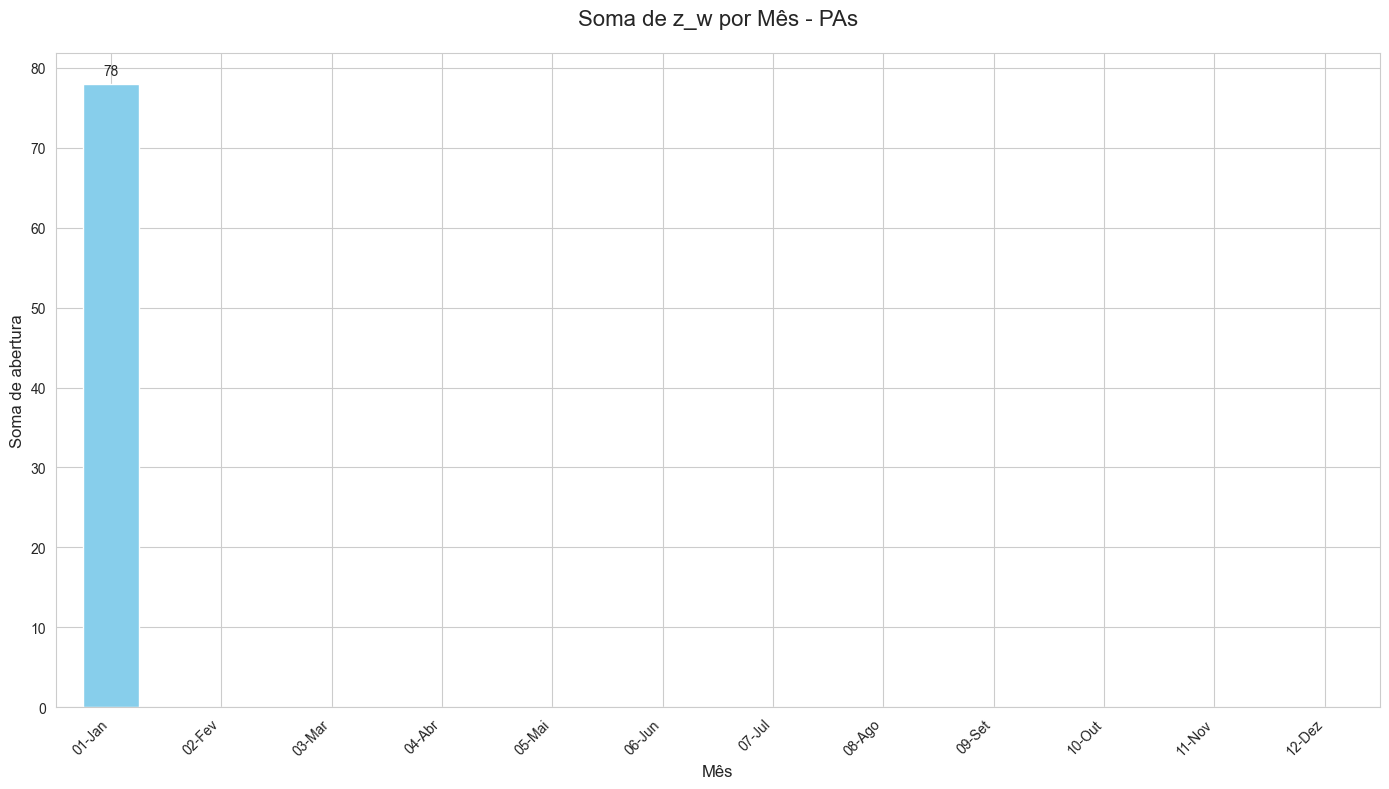

In [40]:
df_pa = df.loc[df['Ref'] == 'PA']

# Agrupar por mês ('Mes') e calcular a soma da coluna 'z_w' para cada mês
monthly_data = df_pa[['Mes', 'Origem', 'z_w']].drop_duplicates().groupby(['Mes'])['z_w'].sum()

# Supondo que 'df' seja o seu DataFrame carregado

df_pa = df.loc[df['Ref'] == 'PA']

# Agrupar por mês ('Mes') e calcular a soma da coluna 'z_w' para cada mês
monthly_data = df_pa[['Mes', 'Origem', 'z_w']].drop_duplicates().groupby(['Mes'])['z_w'].sum()

# Criar a figura e os eixos do gráfico
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Plotar o gráfico de barras
ax = monthly_data.plot(kind='bar', color='skyblue')

# Adicionar rótulos de dados
for p in ax.patches:
    if p.get_height() > 0:
        # Adiciona o rótulo acima da barra
        ax.annotate(f'{p.get_height():.0f}',  # Formata o valor (opcional: .2f para 2 casas decimais)
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),  # Deslocamento vertical do texto (ajuste conforme necessário)
                textcoords='offset points')

# Definir o título do gráfico, rótulos dos eixos e outras configurações
plt.title('Soma de z_w por Mês - PAs', fontsize=16, pad=20)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Soma de abertura', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

# Exibir o gráfico
plt.show()

In [41]:
df_plot = df.loc[df['Ref']!='Fabrica', ['Ref', 'Origem', 'lat_origem', 'lon_origem', 'uf_origem', 'cid_origem', 'z_w']].drop_duplicates()
df_plot = df_plot.reset_index(drop=True)
df_cidades = pd.read_csv(rf'D:\OneDrive\Documentos\Materiais didáticos\MECAI\Dissertação\script\Dados Gerados Mestrado\Auxiliar\df_cluster_pa_cities.csv',\
                          encoding='utf-8', sep=',', )
df_cidades = df_cidades.loc[~df_cidades['nome_cidade'].isin(df_plot['cid_origem'].unique()), :].drop_duplicates().reset_index(drop=True)
df_cidades = df_cidades.rename(columns={'nome_cidade': 'cid_origem', 'latitude_cidade': 'lat_origem', 'longitude_cidade': 'lon_origem'})

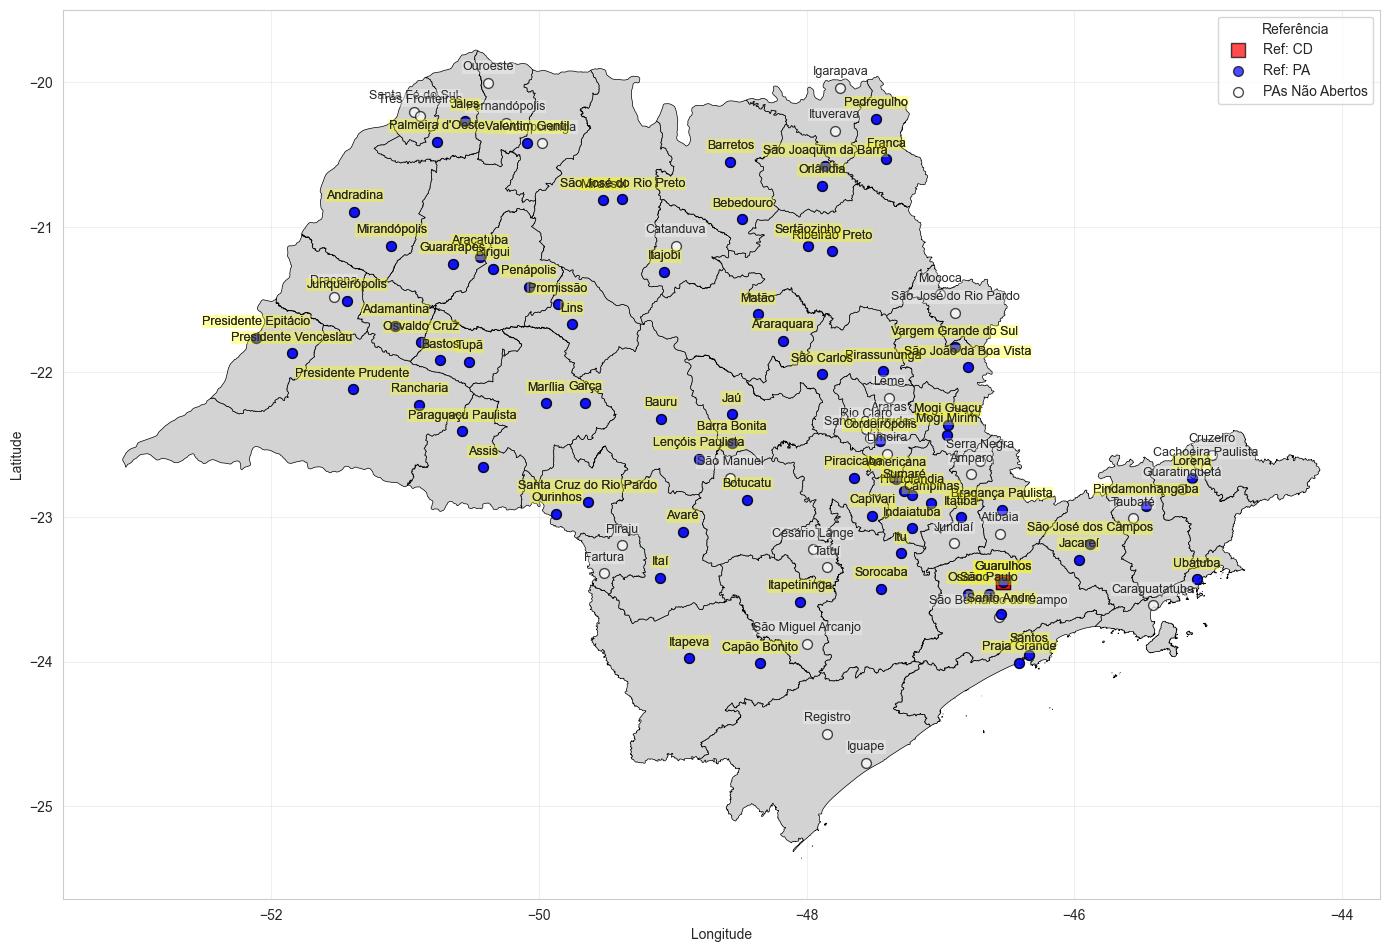

In [42]:
import matplotlib.pyplot as plt

def plotar_grafico(df, df_cidades):
    # Configurações de estilo
    ref_config = {
        'CD': {'color': 'red', 'marker': 's', 'size': 100, 'label_color': 'yellow'},
        'PA': {'color': 'blue', 'marker': 'o', 'size': 50, 'label_color': 'yellow'},
        # Padrão para Refs não especificadas
        'default': {'color': 'gray', 'marker': 'o', 'size': 50, 'label_color': 'yellow'}
    }
    
    # Criar figura
    fig, ax = plt.subplots(figsize=(14, 12))
    geo_df.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)
    
    # Lista para armazenar handles da legenda
    legend_handles = []
    
    def plot_group(data, is_city=False):
        for ref, group in data.groupby('Ref' if not is_city else 'cid_origem'):
            config = ref_config.get(ref, ref_config['default']) if not is_city else {
                'color': 'white',
                'marker': 'o',
                'size': 50,
                'label_color': 'white'
            }
            
            # Criar scatter plot com label para legenda
            if not is_city:
                scatter = plt.scatter(
                    group['lon_origem'], 
                    group['lat_origem'],
                    c=config['color'],
                    marker=config['marker'],
                    s=config['size'],
                    edgecolor='black',
                    label=f'Ref: {ref}',
                    alpha=0.7
                )
                legend_handles.append(scatter)
            else:
                plt.scatter(
                    group['lon_origem'], 
                    group['lat_origem'],
                    c=config['color'],
                    marker=config['marker'],
                    s=config['size'],
                    edgecolor='black',
                    alpha=0.7
                )
            
            # Adicionar labels de texto
            for _, row in group.iterrows():
                plt.text(
                    row['lon_origem'],
                    row['lat_origem'] + 0.09,
                    row['cid_origem'],
                    fontsize=9,
                    ha='center',
                    bbox=dict(
                        facecolor=config['label_color'],
                        alpha=0.3 if is_city else 0.2,
                        edgecolor='none',
                        pad=0.5
                    )
                )
    
    # Plotar grupos
    plot_group(df_cidades, is_city=True)
    plot_group(df)
    
    # Adicionar entrada para cidades na legenda
    city_scatter = plt.scatter([], [], c='white', marker='o', s=50, 
                              edgecolor='black', label='PAs Não Abertos', alpha=0.7)
    legend_handles.append(city_scatter)
    
    # Configurações finais
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    # plt.title('CDs, PAs e PAs Não Abertos - Localização por Origem', fontsize=16, pad=20)
    
    # Criar legenda com os handles coletados
    plt.legend(handles=legend_handles, title='Referência', loc='best')
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Chamada da função
plotar_grafico(df_plot, df_cidades)

In [43]:
print(sorted(list(df_cidades.loc[~df_cidades['cid_origem'].isin(df_plot['cid_origem'].unique()), 'cid_origem'].unique())))

['Amparo', 'Araras', 'Atibaia', 'Cachoeira Paulista', 'Caraguatatuba', 'Catanduva', 'Cesário Lange', 'Cruzeiro', 'Dracena', 'Fartura', 'Fernandópolis', 'Guaratinguetá', 'Igarapava', 'Iguape', 'Ituverava', 'Jundiaí', 'Leme', 'Limeira', 'Mococa', 'Ouroeste', 'Piraju', 'Registro', 'Rio Claro', 'Santa Fé do Sul', 'Santa Gertrudes', 'Serra Negra', 'São Bernardo do Campo', 'São José do Rio Pardo', 'São Manuel', 'São Miguel Arcanjo', 'Tatuí', 'Taubaté', 'Três Fronteiras', 'Votuporanga']


In [44]:
print(sorted(list(df_plot['cid_origem'].unique())))

['Adamantina', 'Americana', 'Andradina', 'Araraquara', 'Araçatuba', 'Assis', 'Avaré', 'Barra Bonita', 'Barretos', 'Bastos', 'Bauru', 'Bebedouro', 'Birigui', 'Botucatu', 'Bragança Paulista', 'Campinas', 'Capivari', 'Capão Bonito', 'Cordeirópolis', 'Franca', 'Garça', 'Guararapes', 'Guarulhos', 'Hortolândia', 'Indaiatuba', 'Itajobi', 'Itapetininga', 'Itapeva', 'Itatiba', 'Itaí', 'Itu', 'Jacareí', 'Jales', 'Jaú', 'Junqueirópolis', 'Lençóis Paulista', 'Lins', 'Lorena', 'Marília', 'Matão', 'Mirandópolis', 'Mirassol', 'Mogi Guaçu', 'Mogi Mirim', 'Orlândia', 'Osasco', 'Osvaldo Cruz', 'Ourinhos', "Palmeira d'Oeste", 'Paraguaçu Paulista', 'Pedregulho', 'Penápolis', 'Pindamonhangaba', 'Piracicaba', 'Pirassununga', 'Praia Grande', 'Presidente Epitácio', 'Presidente Prudente', 'Presidente Venceslau', 'Promissão', 'Rancharia', 'Ribeirão Preto', 'Santa Cruz do Rio Pardo', 'Santo André', 'Santos', 'Sertãozinho', 'Sorocaba', 'Sumaré', 'São Carlos', 'São Joaquim da Barra', 'São José do Rio Preto', 'São 

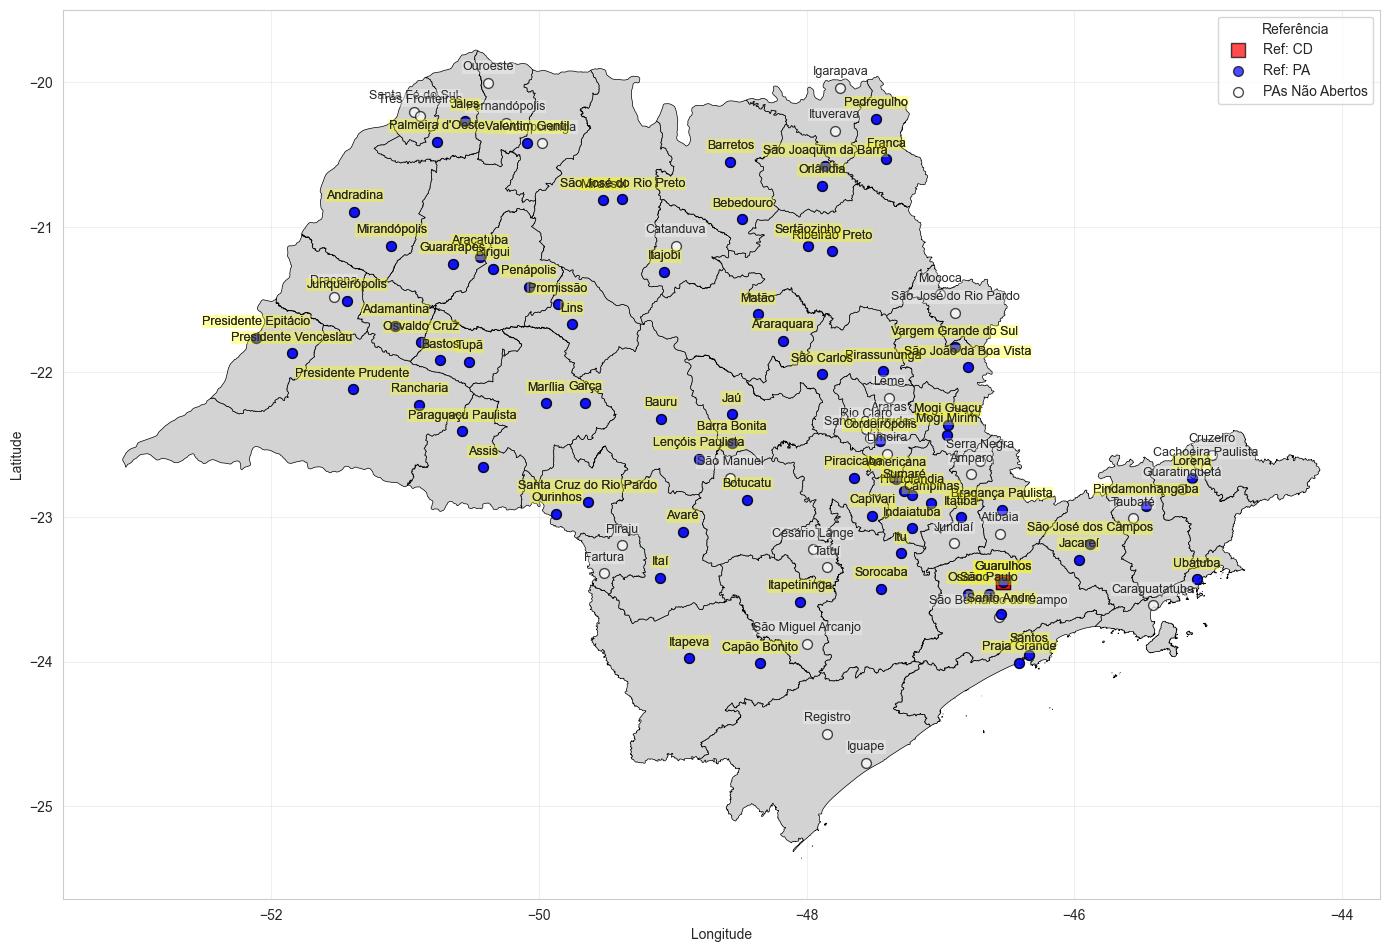

In [45]:
plotar_grafico(df_plot, df_cidades)

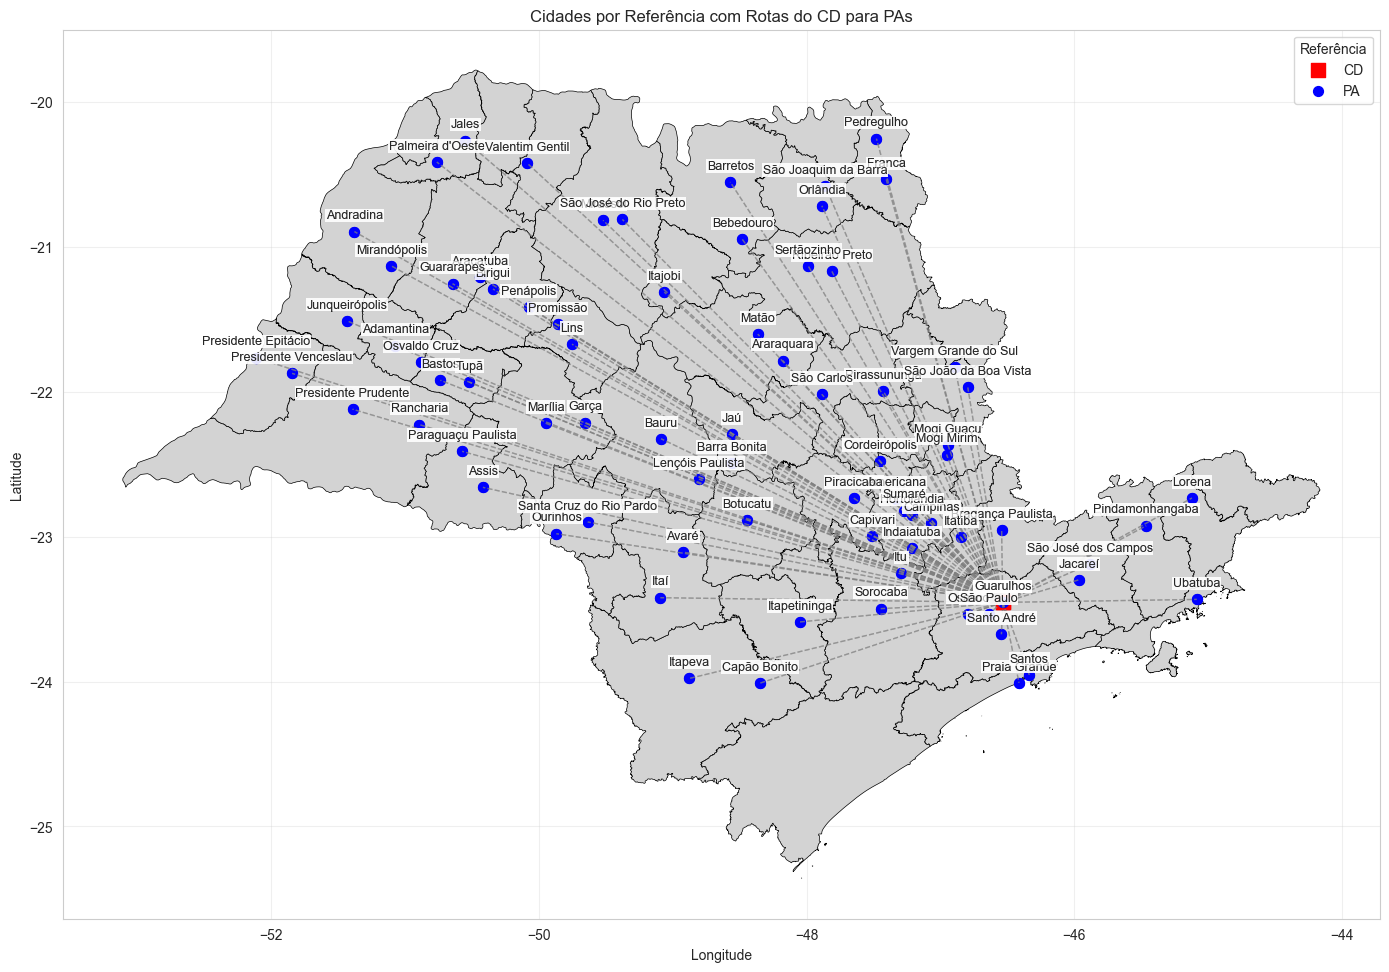

In [46]:
def plotar_grafico_traço(df):
    # Dicionário de cores para cada Ref
    ref_cores = {
        'CD': 'red',
        'PA': 'blue',
        # Adicione outras Refs e cores conforme necessário
    }
    
    # Dicionário de marcadores para cada Ref
    ref_markers = {
        'CD': 's',  # quadrado
        'PA': 'o',  # círculo
        # Adicione outros marcadores conforme necessário
    }

    ref_size = {
        'CD': 100,
        'PA': 50,
        # Adicione outros tamanhos conforme necessário
    }
    
    fig, ax = plt.subplots(figsize=(14, 12))
    geo_df.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)
    
    # Encontrar as coordenadas do CD
    cd_data = df[df['Ref'] == 'CD']
    if not cd_data.empty:
        cd_lon = cd_data['lon_origem'].iloc[0]
        cd_lat = cd_data['lat_origem'].iloc[0]
    
    # Plotar cada grupo separadamente
    for ref, group in df.groupby('Ref'):
        scatter = plt.scatter(
            group['lon_origem'], 
            group['lat_origem'],
            c=ref_cores.get(ref, 'gray'),
            marker=ref_markers.get(ref, 'o'),
            s=ref_size.get(ref, 50),
            label=ref
        )
        
        # Adicionar rótulos das cidades
        for _, row in group.iterrows():
            plt.text(
                row['lon_origem'], 
                row['lat_origem'] + 0.09,  # Ajuste vertical para evitar sobreposição
                row['cid_origem'],          # Nome da cidade
                fontsize=9,                 # Tamanho da fonte
                ha='center',                 # Alinhamento horizontal
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=0.5)
            )
            
            # Desenhar linhas do CD para os PAs
            if ref == 'PA' and not cd_data.empty:
                plt.plot(
                    [cd_lon, row['lon_origem']],
                    [cd_lat, row['lat_origem']],
                    color='gray',
                    linestyle='--',
                    linewidth=1,
                    alpha=0.5
                )
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Cidades por Referência com Rotas do CD para PAs')
    plt.legend(title='Referência')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

plotar_grafico_traço(df_plot)

In [47]:
df_info_zd = df_dist_ZD_PA.iloc[:,1:5].rename(columns={'latitude_cidade': 'lat_zd', 'longitude_cidade': 'lon_zd'})
df_teste = df.loc[(df['Origem'].str.startswith('PA')) & (df['Destino'].str.startswith('ZD')) &
                (df['b_rota']==1), ['Origem', 'Destino', 'lat_origem', 'lon_origem']].drop_duplicates().reset_index(drop=True)
df_teste = pd.merge(df_teste, df_info_zd, left_on='Destino', right_on='ZD', how='left')

In [48]:
df_teste = pd.merge(df_teste, df_plot.loc[:, ['Origem', 'cid_origem']], left_on='Origem', right_on='Origem', how='left')

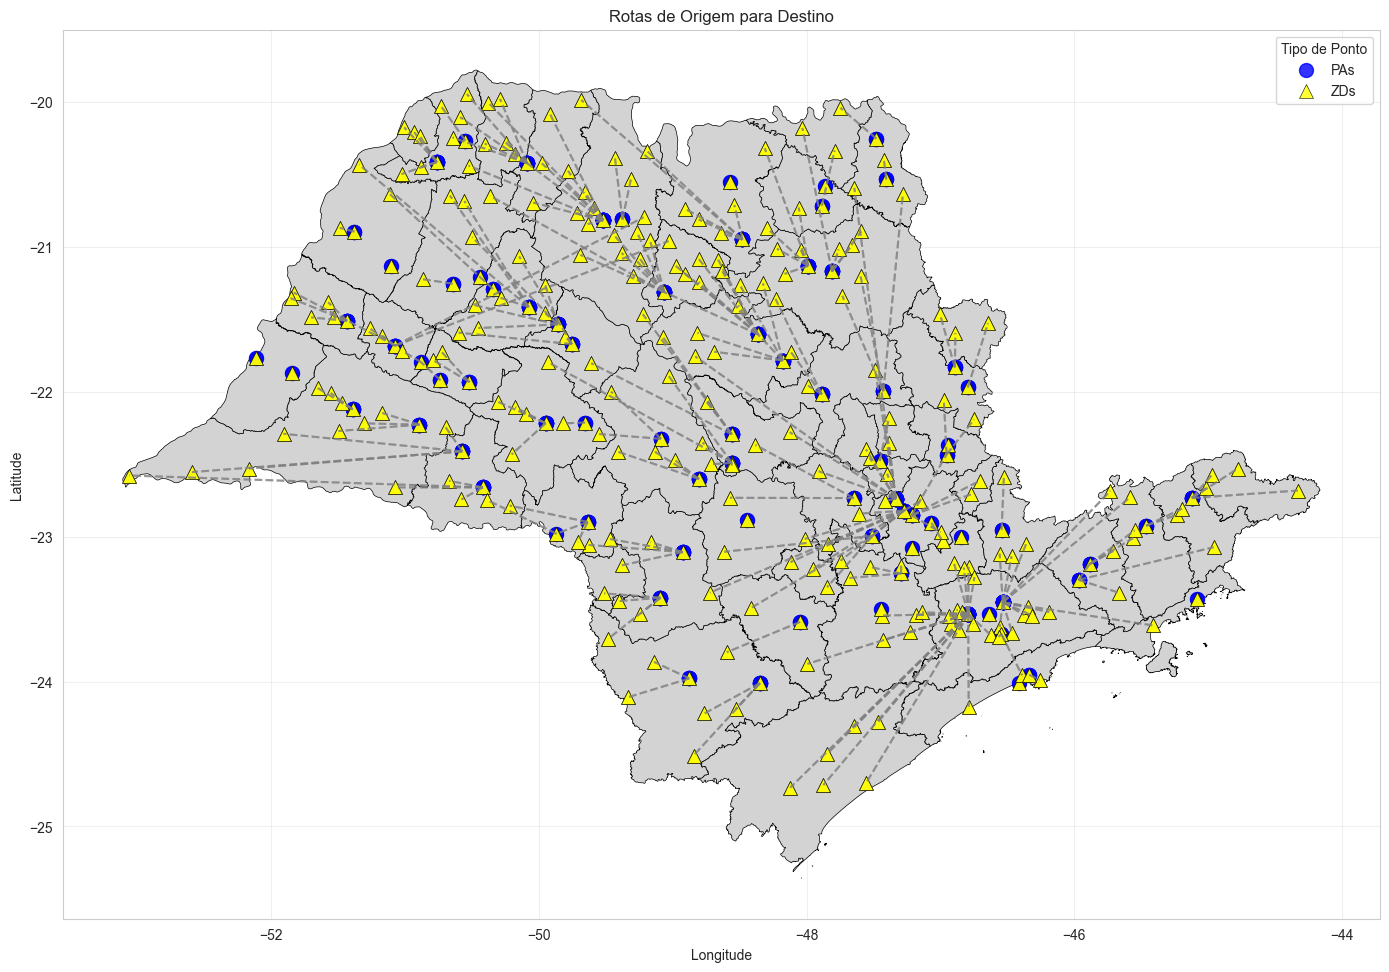

In [49]:
def plotar_grafico_traço(df):
    fig, ax = plt.subplots(figsize=(14, 12))
    geo_df.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)
    
    # Plotar pontos de Origem (círculo azul)
    scatter_origem = plt.scatter(
        df['lon_origem'], 
        df['lat_origem'],
        c='blue',
        marker='o',
        s=100,
        label="PAs",
        alpha=0.8
    )
    
    # Plotar pontos de Destino (triângulo amarelo)
    scatter_destino = plt.scatter(
        df['lon_zd'], 
        df['lat_zd'],
        c='yellow',
        marker='^',
        s=100,
        label='ZDs',
        alpha=0.8,
        edgecolors='black',
        linewidth=0.5
    )
    
    # # Adicionar rótulos das origens (Origem + nome_cidade)
    # for _, row in df.iterrows():
    #     plt.text(
    #         row['lon_origem'], 
    #         row['lat_origem'] + 0.09,
    #         f"{row['Origem']}", # f"{row['Origem']} - {row['nome_cidade']}",
    #         fontsize=9,
    #         ha='center',
    #         bbox=dict(facecolor='lightblue', alpha=0.7, edgecolor='none', pad=0.5)
    #     )
    
    # # Adicionar rótulos dos destinos (Destino + cid_origem)
    # for _, row in df.iterrows():
    #     plt.text(
    #         row['lon_zd'], 
    #         row['lat_zd'] + 0.09,
    #         f"{row['Destino']}", # f"{row['Destino']} - {row['cid_origem']}"
    #         fontsize=9,
    #         ha='center',
    #         bbox=dict(facecolor='lightyellow', alpha=0.7, edgecolor='none', pad=0.5)
    #     )
    
    # Desenhar linhas tracejadas de origem para destino
    for _, row in df.iterrows():
        plt.plot(
            [row['lon_origem'], row['lon_zd']],
            [row['lat_origem'], row['lat_zd']],
            color='gray',
            linestyle='--',
            linewidth=1.5,
            alpha=0.6
        )
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Rotas de Origem para Destino')
    plt.legend(title='Tipo de Ponto')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Chamada da função
plotar_grafico_traço(df_teste)

In [50]:
df.loc[(df['Ref'] == 'PA') &
       (df['Abrv Var'] == 'qaj')].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Abrv Var'])['Valor'].sum().sort_values(ascending=False)

Ref  Origem   uf_origem  cid_origem            Abrv Var
PA   PA_0100  SP         São Paulo             qaj         384887.0
     PA_0065  SP         Osasco                qaj         157542.0
     PA_0035  SP         Guarulhos             qaj         110958.0
     PA_0089  SP         Santo André           qaj          66165.0
     PA_0002  SP         Americana             qaj          43051.0
                                                             ...   
     PA_0080  SP         Presidente Venceslau  qaj           1314.0
     PA_0078  SP         Presidente Epitácio   qaj           1125.0
     PA_0059  SP         Mirandópolis          qaj           1043.0
     PA_0067  SP         Ourinhos              qaj            851.0
     PA_0066  SP         Osvaldo Cruz          qaj            759.0
Name: Valor, Length: 78, dtype: float64

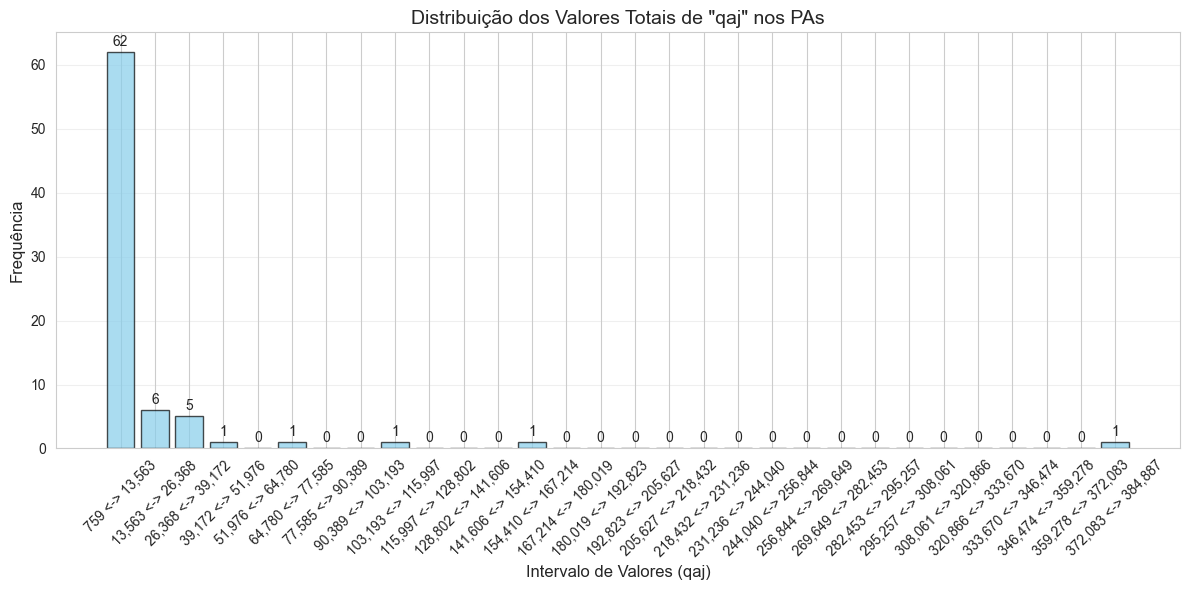

In [51]:
# Filtrar e preparar os dados (como antes)
dados_pa_qaj = df.loc[
    (df['Ref'] == 'PA') & 
    (df['Abrv Var'] == 'qaj')
].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Abrv Var'])['Valor'].sum().sort_values(ascending=False)

df_hist = dados_pa_qaj.reset_index()

# Criar bins (intervalos) manualmente para controle
valores = df_hist['Valor']
bins = 30  # Número de barras
hist, bin_edges = np.histogram(valores, bins=bins)

# Definir posições das barras com espaçamento
largura_barra = (bin_edges[1] - bin_edges[0]) * 0.8  # 80% da largura original
posicoes = bin_edges[:-1] + (bin_edges[1] - bin_edges[0]) * 0.1  # Centralizar + espaço

# Plotar as barras
plt.figure(figsize=(12, 6))
barras = plt.bar(
    posicoes, 
    hist, 
    width=largura_barra, 
    color='skyblue', 
    edgecolor='black',
    alpha=0.7
)

# Adicionar rótulos em cada barra
for barra, valor in zip(barras, hist):
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # Posição X (centro da barra)
        altura + 0.5,                            # Posição Y (acima da barra)
        f'{int(valor)}',                         # Texto (valor)
        ha='center',                             # Alinhamento horizontal
        va='bottom',                             # Alinhamento vertical
        fontsize=10
    )

# Ajustar eixos e título
plt.xlabel('Intervalo de Valores (qaj)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Distribuição dos Valores Totais de "qaj" nos PAs', fontsize=14)
plt.xticks(posicoes, [f'{bin_edges[i]:,.0f} <-> {bin_edges[i+1]:,.0f}' for i in range(bins)], rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [52]:
df.loc[(df['Ref'] == 'CD') & (df['Destino'] == 'PA_0056')].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Origem', 'Mes', 'Abrv Var'])['Valor'].\
    sum().unstack(level='Mes').applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_28016\1107061188.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sum().unstack(level='Mes').applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


,,,,,Mes,01-Jan,02-Fev,03-Mar,04-Abr,05-Mai,06-Jun,07-Jul,08-Ago,09-Set,10-Out,11-Nov,12-Dez
Ref,Origem,uf_origem,cid_origem,Origem,Abrv Var,,,,,,,,,,,,
CD,CD_0002,SP,Guarulhos,CD_0002,qap,0,837,861,475,915,431,840,0,122,"1,090",147,636


In [53]:
df.loc[df['Origem'] == 'PA_0066'].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
    applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_28016\3642971027.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


Mes                                         01-Jan 02-Fev 03-Mar 04-Abr  \
Ref Origem  uf_origem cid_origem   Abrv Var                               
PA  PA_0066 SP        Osvaldo Cruz qaj          66     49     84     67   
                                   qrc           0     -0    261      0   
                                   qrp          57     31     95     58   
                                   sp        1,200  1,182    932  1,250   
                                   spbj        600    551    467    727   
                                   sprc        600    631    465    523   

Mes                                         05-Mai 06-Jun 07-Jul 08-Ago  \
Ref Origem  uf_origem cid_origem   Abrv Var                               
PA  PA_0066 SP        Osvaldo Cruz qaj          61     75      0     76   
                                   qrc           0      0      0      0   
                                   qrp          53     65      0     66   
                                   sp        1,250  1,240  1,240  1,230   
                                   spbj        674    599    599    523   
                                   sprc        576    641    641    707   

Mes                                         09-Set 10-Out 11-Nov 12-Dez  
Ref Origem  uf_origem cid_origem   Abrv Var                              
PA  PA_0066 SP        Osvaldo Cruz qaj          68     90     58     65  
                                   qrc           0      0      0      0  
                                   qrp          58     78     50     57  
                                   sp        1,220  1,208  1,200  1,250  
                                   spbj        455    365    307    300  
                                   sprc        765    843    893    950

In [54]:
df.loc[df['Origem'] == 'PA_0032'].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
    applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_28016\1091802412.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


Mes                                       01-Jan 02-Fev 03-Mar 04-Abr 05-Mai  \
Ref Origem  uf_origem cid_origem Abrv Var                                      
PA  PA_0032 SP        Garça      qaj         124    159    209    151    140   
                                 qrc           0     -0      0      0      0   
                                 qrp         107    101    236    130    121   
                                 sp        3,575  3,517  3,544  3,523  3,504   
                                 spbj      1,775  1,616  1,407  1,256  1,116   
                                 sprc      1,800  1,901  2,137  2,267  2,388   

Mes                                       06-Jun 07-Jul 08-Ago 09-Set 10-Out  \
Ref Origem  uf_origem cid_origem Abrv Var                                      
PA  PA_0032 SP        Garça      qaj         206    152    187    150    174   
                                 qrc           0    663      0      0      0   
                                 qrp         179    131    163    130    151   
                                 sp        3,477  2,923  3,700  3,680  3,700   
                                 spbj        910    888  1,502  1,352  1,220   
                                 sprc      2,567  2,036  2,198  2,328  2,480   

Mes                                       11-Nov 12-Dez  
Ref Origem  uf_origem cid_origem Abrv Var                
PA  PA_0032 SP        Garça      qaj         212    172  
                                 qrc           0      0  
                                 qrp         184    149  
                                 sp        3,672  3,700  
                                 spbj      1,008    888  
                                 sprc      2,664  2,812